<a href="https://colab.research.google.com/github/NaithaniAR/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

Mounting Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.linear_model import Ridge,Lasso, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import os
#print(os.listdir("../input"))



from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Importing Datasets 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/bank-full.csv',sep=';')

#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

# Marketing
Marketing is the process of exploring, creating, and delivering value to meet the needs of a target market in terms of goods and services; potentially including selection of a target audience; selection of certain attributes or themes to emphasize in advertising; operation of advertising campaigns; attendance at trade shows and public events; design of products and packaging attractive to buyers; defining the terms of sale, such as price, discounts, warranty, and return policy; product placement in media or with people believed to influence the buying habits of others; agreements with retailers, wholesale distributors, or resellers; and attempts to create awareness of, loyalty to, and positive feelings about a brand

## Data Exploration

In [ ]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Catagorical columns 

categorical_features  = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

# Numerical columns

numerical_features  = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']


In [ ]:
# Pearson correlation coefficient

df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


## Checking for null values 

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

# Exploratory data analysis 


## Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

Categorical columns 


In [ ]:
categorical_features  = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

<Figure size 1080x360 with 0 Axes>

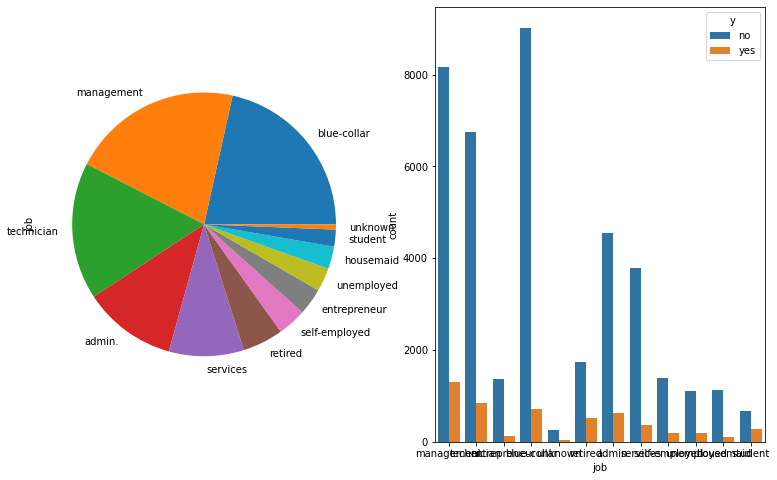

<Figure size 1080x360 with 0 Axes>

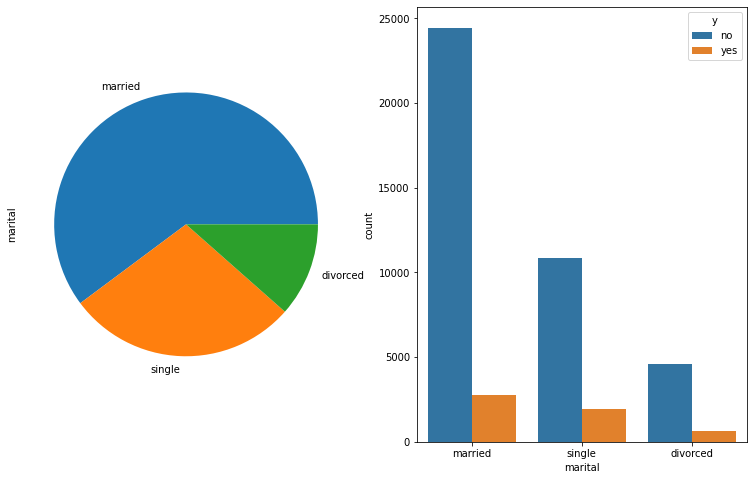

<Figure size 1080x360 with 0 Axes>

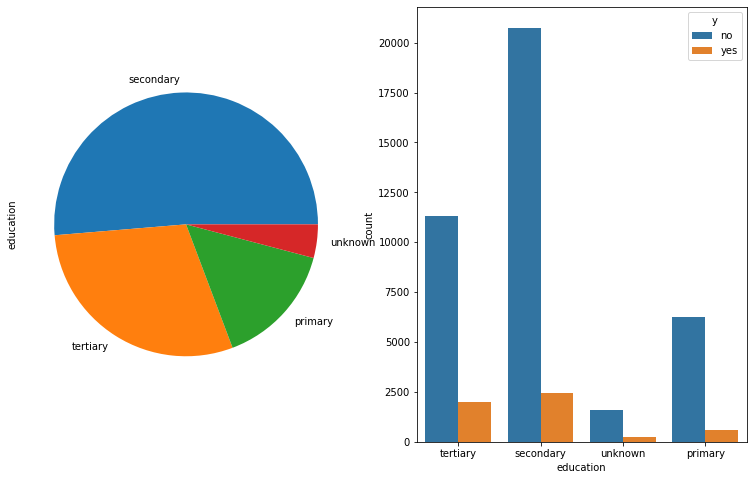

<Figure size 1080x360 with 0 Axes>

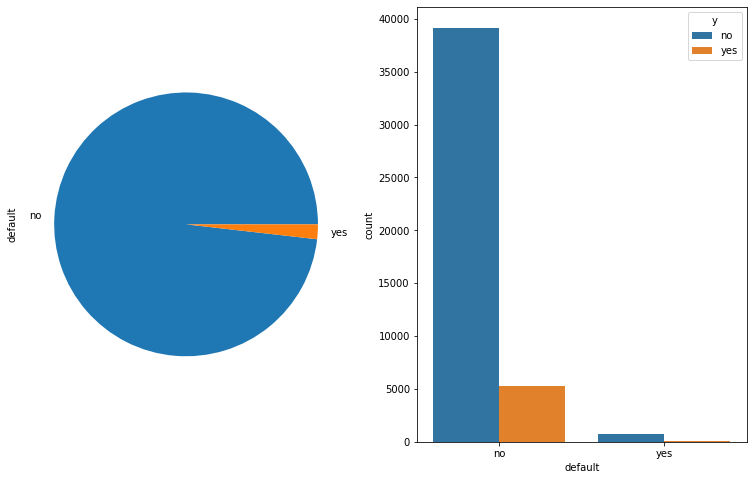

<Figure size 1080x360 with 0 Axes>

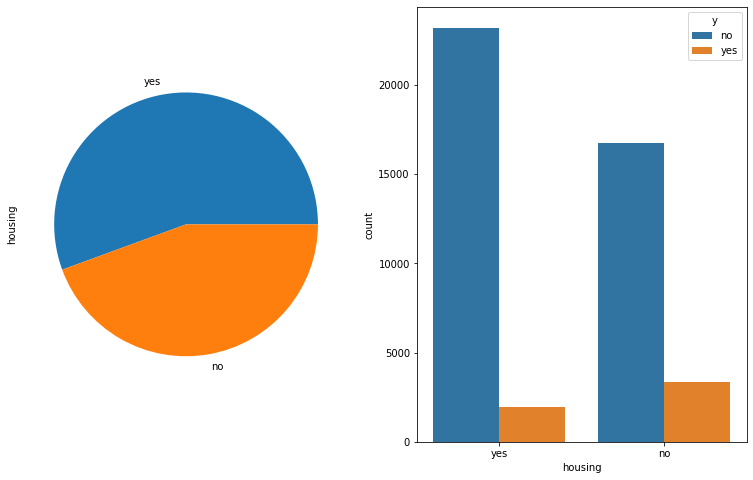

<Figure size 1080x360 with 0 Axes>

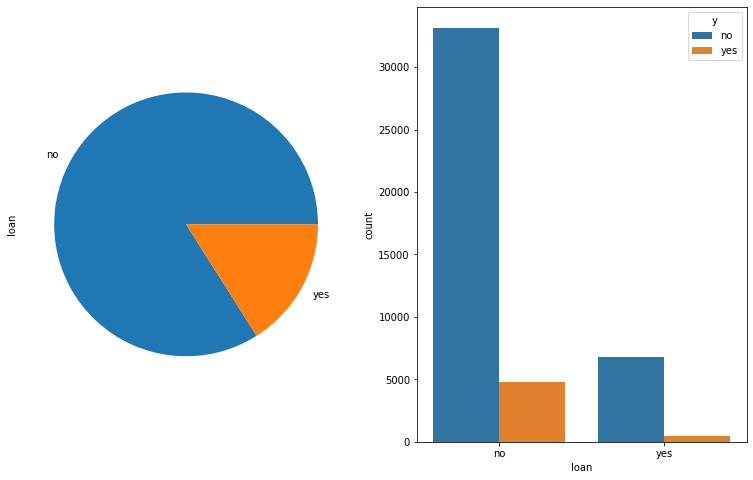

<Figure size 1080x360 with 0 Axes>

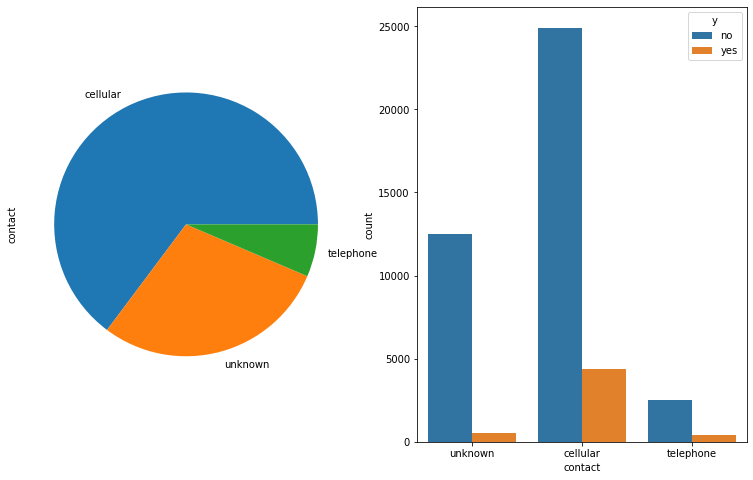

<Figure size 1080x360 with 0 Axes>

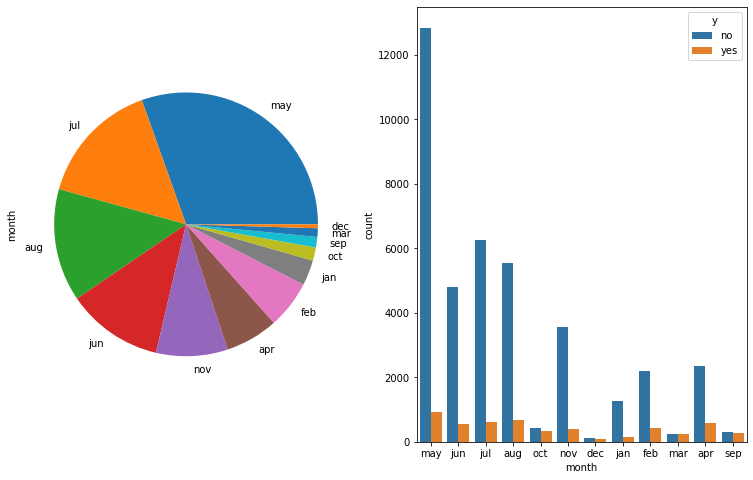

<Figure size 1080x360 with 0 Axes>

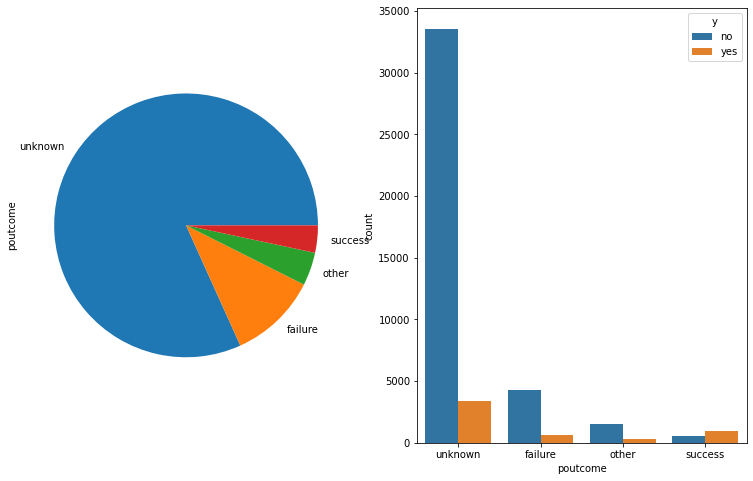

In [ ]:
#plot to determine the relationship between categories

for col in categorical_features:
  plt.figure(figsize=(15,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'y', data = df)

Numerical columns 


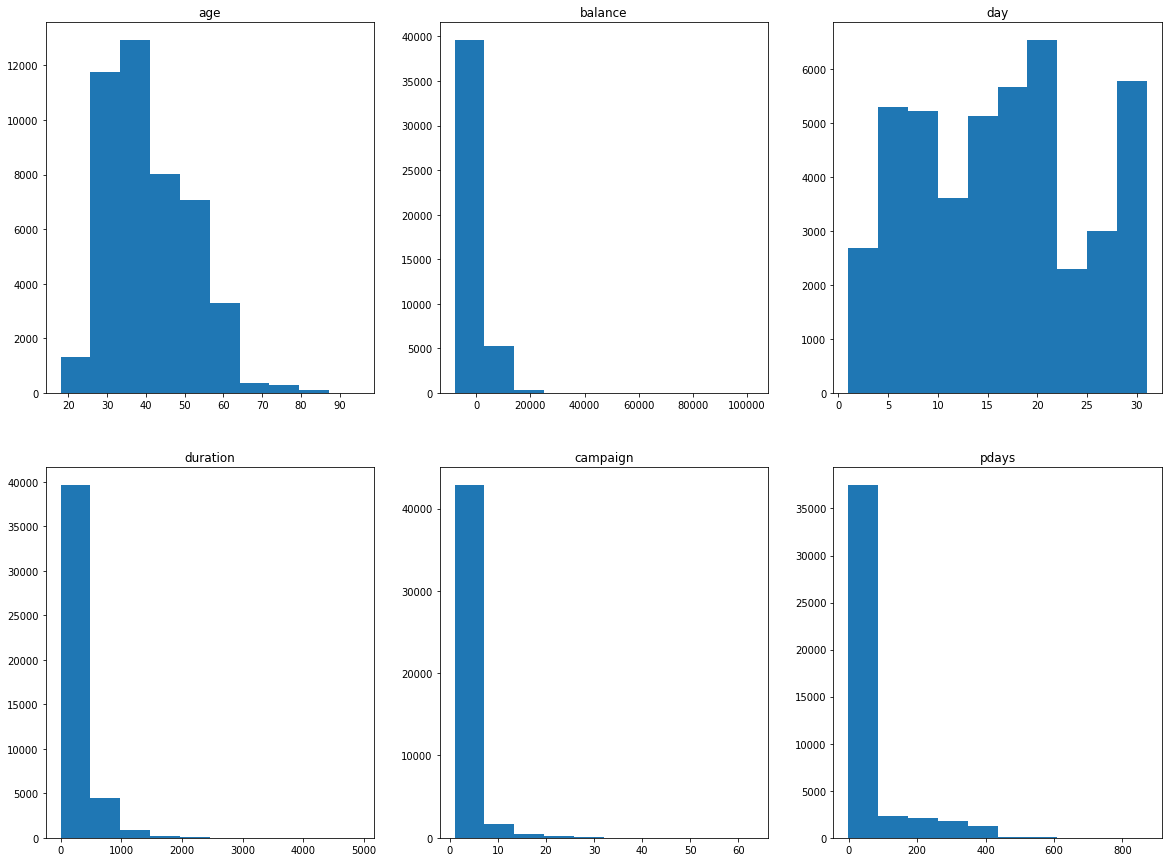

In [ ]:
#Numerical columns Visualization




fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for numerical_feature in numerical_features:
    
    trace_x = counter // 3
    trace_y = counter % 3
    try:
     axs[trace_x, trace_y].hist(df[numerical_feature])
    
     axs[trace_x, trace_y].set_title(numerical_feature)
    except Exception:
     pass   
    
    counter += 1

plt.show()

# Numerical columns

num_columns = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns).We should look closer at the data.



In [ ]:
df[num_columns].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


 pdays shows number of days that passed  after the client was last contacted from a previous campaign. in this variable values range from -1 to 871. Assuming -1 means that the customer was contacted and no days has lapsed since last contact.Since the entry in data has info of existing clients it makes sense that the client was definitely contacted atleast once, will further verify this theory 

In [ ]:

df.loc[(df['pdays']==-1) & (df['y']=='yes')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,3384.00,3384.00,3384.00,3384.00,3384.00,3384.00,3384.00
mean,41.22,1701.31,15.40,610.50,2.34,-1.00,0.00
std,13.24,3115.38,8.53,423.18,2.21,0.00,0.00
min,18.00,-3058.00,1.00,8.00,1.00,-1.00,0.00
25%,31.00,172.75,8.00,276.00,1.00,-1.00,0.00
50%,38.00,674.00,15.00,529.00,2.00,-1.00,0.00
75%,50.00,2016.50,21.00,835.00,3.00,-1.00,0.00
max,95.00,52587.00,31.00,3881.00,32.00,-1.00,0.00


In [ ]:
df.loc[(df['pdays']==-1) & (df['y']=='no')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,33570.00,33570.00,33570.00,33570.00,33570.00,33570.00,33570.00
mean,40.90,1280.23,16.22,222.17,2.98,-1.00,0.00
std,10.10,3029.18,8.35,209.42,3.41,0.00,0.00
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,48.00,9.00,95.00,1.00,-1.00,0.00
50%,39.00,393.00,17.00,164.00,2.00,-1.00,0.00
75%,48.00,1306.00,22.00,281.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,-1.00,0.00


Since accounts exist  which subscribed and have pdays as -1,all the observatios with pday -1 has zero previous which tilts slightly in our assumption.

What is the distribution of job categories 

# Bivariate Analysis

Q. What is the distribution of people joining and not joining the term deposite ?

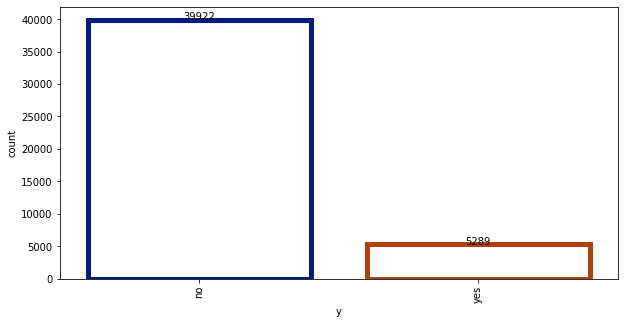

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(x="y", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['y'].value_counts()[i],ha="center")
    i += 1

Q. Run a visual analysis on all categorical variables and split it wrt. acceptance to term deposit.

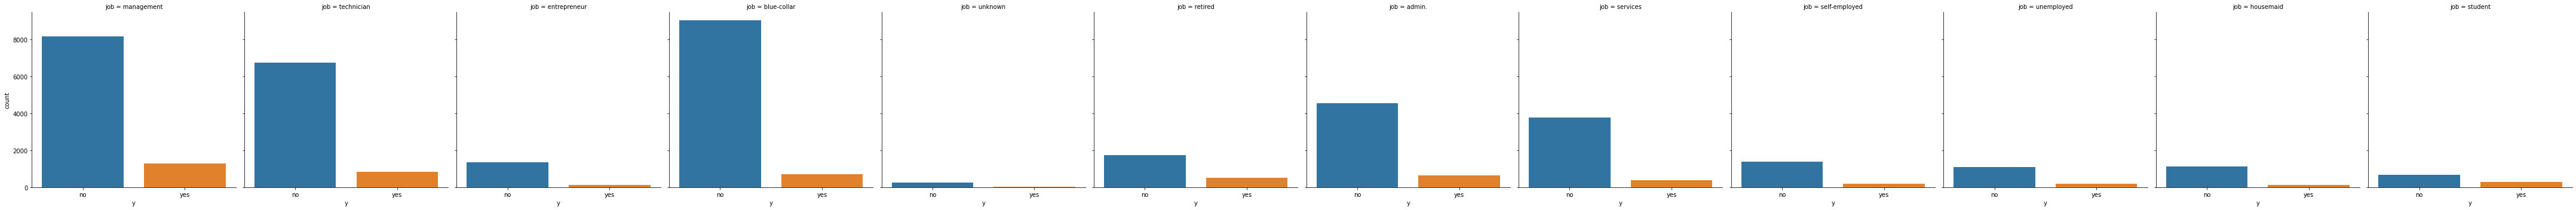

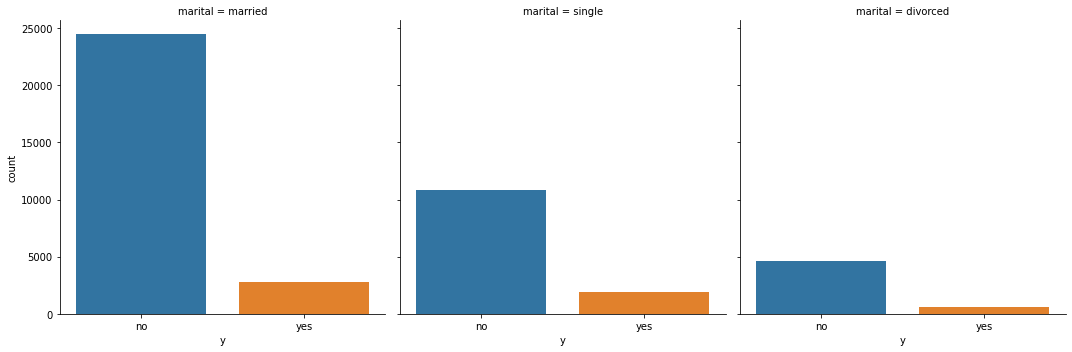

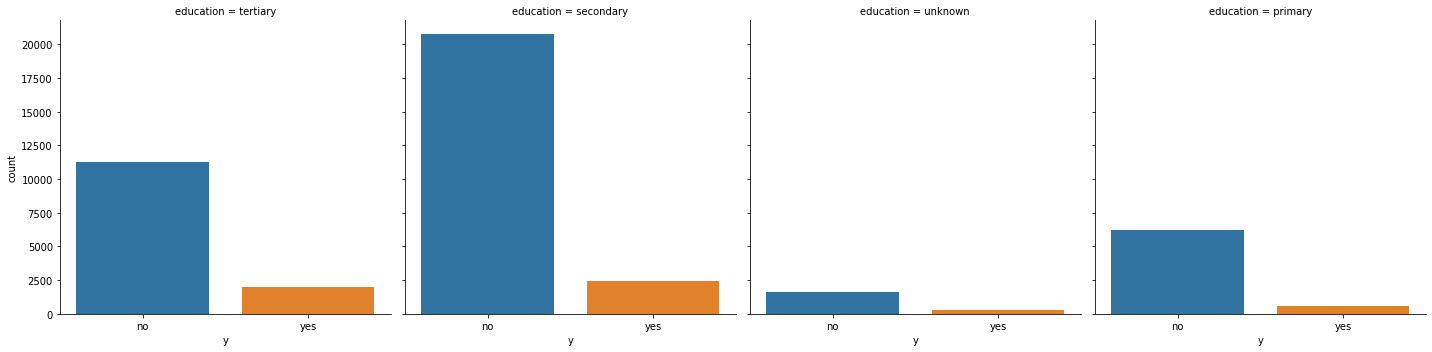

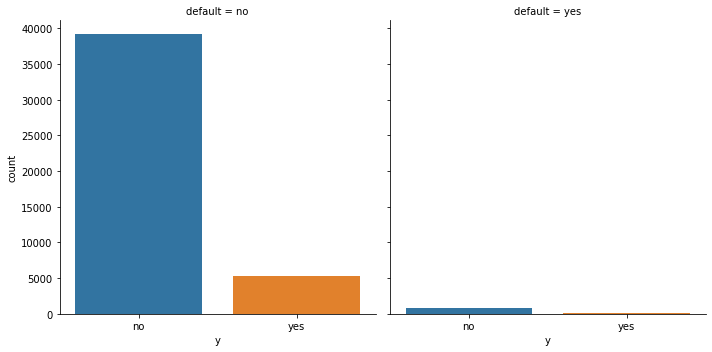

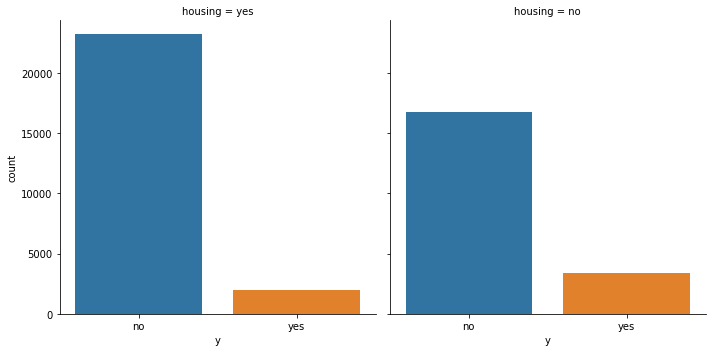

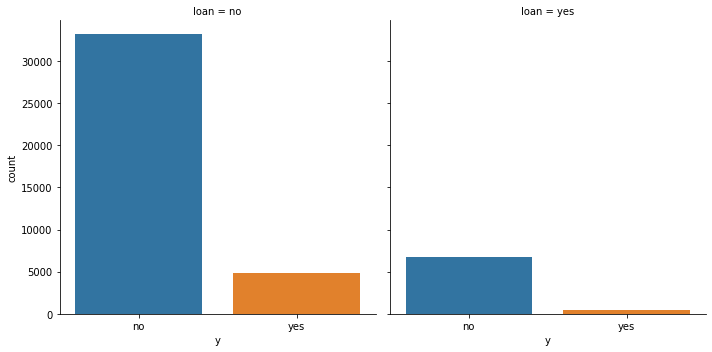

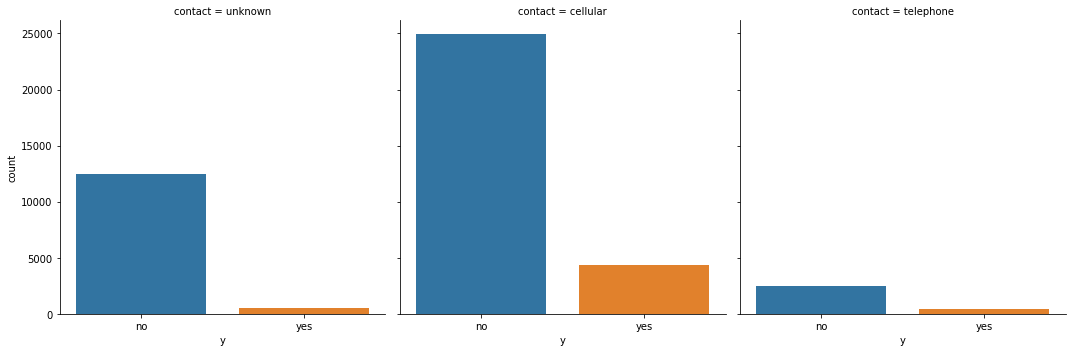

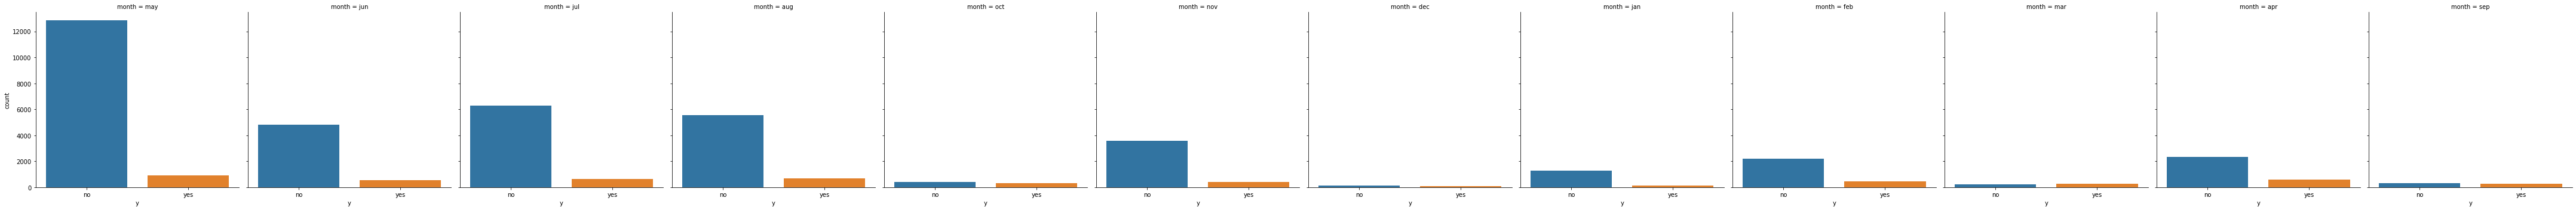

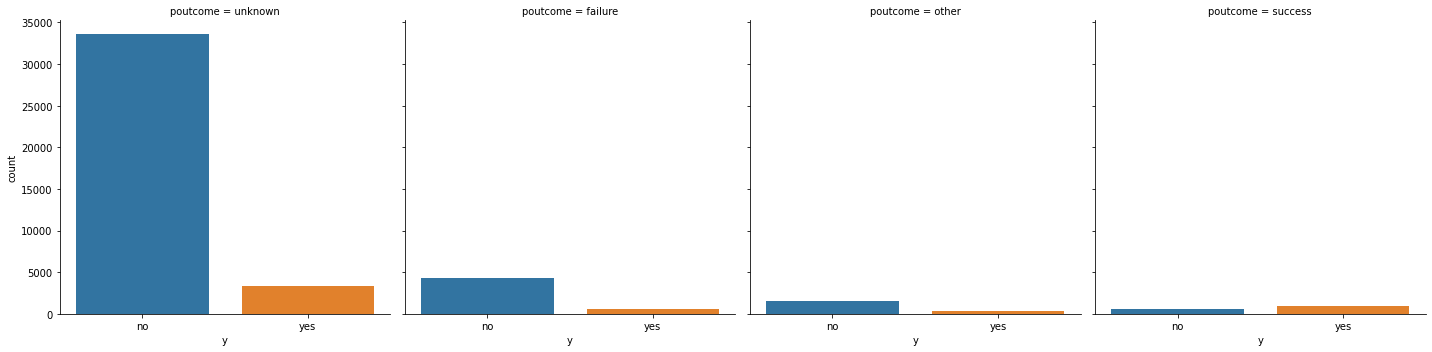

In [ ]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)

plt.show()

Q. Explore the impact of Eduation recived by the clients on the success of the campaign


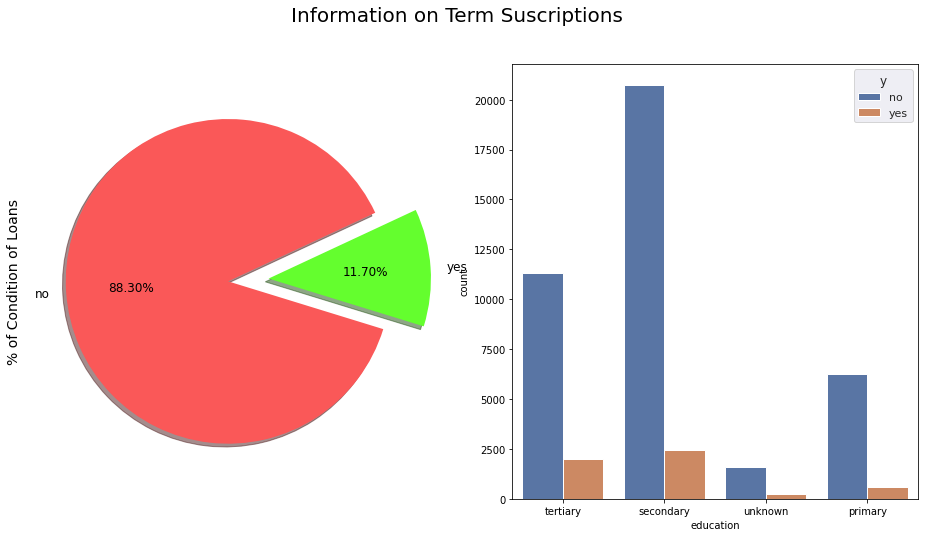

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="no", "yes"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,  labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = [ "#FA5858","#64FE2E"]

sns.set_theme(style="darkgrid")

ax[1] = sns.countplot(x="education",  hue="y",data=df)

In [ ]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (df[df['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.00,39922.00
mean,1.17,0.50
std,2.55,2.26
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,0.00
max,58.00,275.00


In [ ]:

#default features does not play imp role
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

#Feature engineering 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Defining categories 

categorical_features  = ['job', 'marital', 'education', 'contact', 'month','poutcome']

#Creating summies
df_m=pd.get_dummies(df, columns = categorical_features,drop_first=True)

#label encoding 
boolean_columns = ['housing', 'loan', 'y', 'default']
for col in  boolean_columns:
    df_m[col+'_new']=df_m[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_m.drop(col, axis=1, inplace=True)

Train test split

In [ ]:
X = df_m.drop(['y_new'],axis=1)
y = df_m['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)
print(X_train.shape)
print(X_test.shape)

(36168, 42)
(9043, 42)


In [ ]:
X_train.values

array([[  70, 3020,   30, ...,    0,    0,    0],
       [  31,  124,    3, ...,    1,    0,    0],
       [  42,  120,   17, ...,    1,    0,    0],
       ...,
       [  22, 3472,   19, ...,    0,    0,    0],
       [  35,  650,   14, ...,    1,    0,    0],
       [  59, 6955,   20, ...,    0,    1,    0]])

# Oversampling using SMOTE
SMOTE(Synthetic Minority Oversampling Technique)
The dataset is imbalanced which can lead to biasness while building the model. To avoid this we use SMOTE.

SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points.

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
print ('original dataset length',len(X))
print ('Resample dataset length',len(X_train_sm))

original dataset length 45211
Resample dataset length 63802


Scaling on Data set

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Machine learning models 

**Model building** 


We will start by building simple classifiers models and work our way upto more complex models. but first lets start by defining some important function's.

In [ ]:
def fit_mod(model, X_train, X_test, y_train, y_test):

  '''Takes Classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  global modelprediction
  # Fitting the model

  model.fit(X_train, y_train)
  modelprediction = model.predict(X_test)
  model_accuracy = accuracy_score(y_test, modelprediction) 


  print("Training accuracy Score    : ",model.score(X_train, y_train))
  print("Testing accuracy Score : ",model_accuracy )


  print(classification_report(modelprediction,y_test))

  '''


  '''

def confu_mat(model, X_train, X_test, y_train, y_test):

 from sklearn.metrics import confusion_matrix

 conf_matrix = confusion_matrix(y_test, modelprediction)

 
 f, ax = plt.subplots(figsize=(10, 6))
 sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
 plt.title("Confusion Matrix", fontsize=15)
 plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
 ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
 ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
 ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
 plt.show()



'''

'''
def Roc_curve(model, X_train, X_test, y_train, y_test):

  model_probability = model.predict_proba(X_test)[:,1]


  roc_score=roc_auc_score(y_test, model_probability)

  from sklearn.metrics import roc_curve
  fpr, tpr, _ = roc_curve(y_test, model_probability)
  
  
  name= model
  
  plt.title( 'ROC curve')
  plt.xlabel('FPR (Precision)')
  plt.ylabel('TPR (Recall)')

  plt.plot(fpr,tpr)
  plt.plot((0,1), ls='dashed',color='black')
  plt.show()
  return roc_score,fpr,tpr,model_probability

  '''

  '''
def imp_fe(model):

#best_estimator_.feature_importances_

  try:
    features = X.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
  except:
    features = X.columns
    importances = model.best_estimator_.feature_importances_
    indices = np.argsort(importances)
  finally:
    importance = model.best_estimator_.coef_
    #importance is a list so you can plot it. 
    importances = pd.Series(importance)
    indices = np.argsort(importances) 

 #
  plt.figure(figsize=(30,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()



def fit_mod1(model, X_train, X_test, y_train, y_test):

  '''Takes Classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  #global modelprediction
  # Fitting the model

  #model.fit(X_train, y_train)
  modelprediction = model.predict(X_test)
  model_accuracy = accuracy_score(y_test, modelprediction) 


  print("Training accuracy Score    : ",model.score(X_train, y_train))
  print("Testing accuracy Score : ",model_accuracy )


  print(classification_report(modelprediction,y_test))




## LogisticRegression

without over sampling 

In [ ]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)

fit_mod(lr, X_train, X_test, y_train, y_test)

Training accuracy Score    :  0.9009345277593452
Testing accuracy Score :  0.8939511224151278
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8856
           1       0.12      0.67      0.21       187

    accuracy                           0.89      9043
   macro avg       0.56      0.78      0.57      9043
weighted avg       0.97      0.89      0.93      9043



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


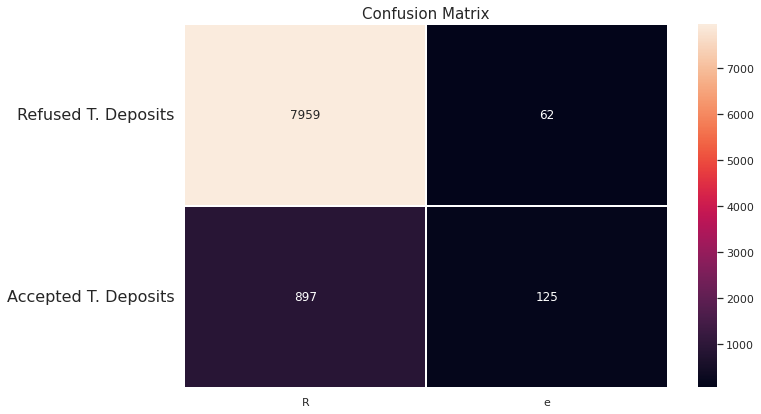

In [ ]:
confu_mat(lr, X_train, X_test, y_train, y_test)

with over sampling

In [ ]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)

fit_mod(lr, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9293125607347732
Testing accuracy Score :  0.887316156142873
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8164
           1       0.43      0.50      0.46       879

    accuracy                           0.89      9043
   macro avg       0.69      0.72      0.70      9043
weighted avg       0.90      0.89      0.89      9043



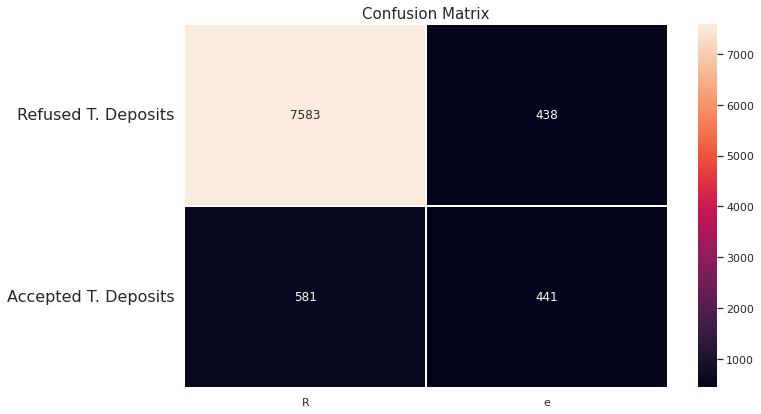

In [ ]:
confu_mat(lr, X_train_sm, X_test, y_train_sm, y_test)

with hyper parameter tuning 

In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3,error_score="raise",)


fit_mod(grid_lr, X_train_sm, X_test, y_train_sm, y_test)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Training accuracy Score    :  0.9297043979812545
Testing accuracy Score :  0.8888643149397324
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8154
           1       0.44      0.51      0.47       889

    accuracy                           0.89      9043
   macro avg       0.69      0.72      0.71      9043
weighted avg       0.90      0.89      0.89      9043



In [ ]:
grid_lr.best_estimator_

LogisticRegression(C=10, solver='liblinear')

In [ ]:
grid_lr.best_params_

{'C': 10, 'penalty': 'l2'}

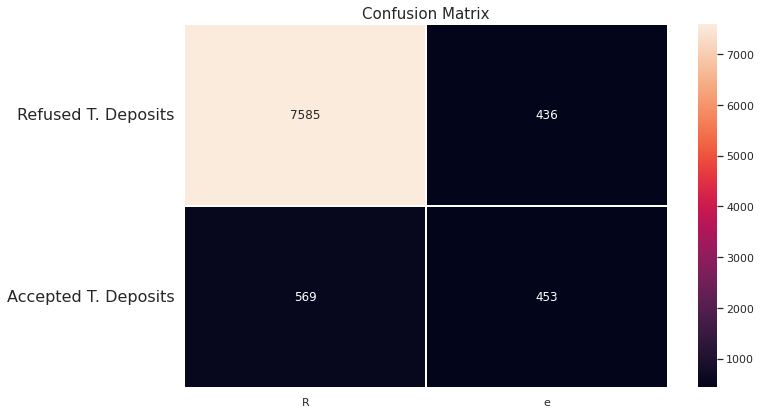

In [ ]:
confu_mat(grid_lr, X_train_sm, X_test, y_train_sm, y_test)

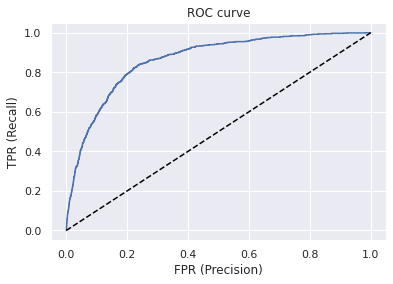

0.8640471892397916

In [ ]:
roc_score_lr,lr_fpr,lr_tpr,lr_probability = Roc_curve(grid_lr, X_train, X_test, y_train, y_test)
roc_score_lr

## Decision Tree Classifier

With oversampling data

In [ ]:
dt = DecisionTreeClassifier()

fit_mod(dt, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8632091120203472
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7834
           1       0.49      0.41      0.45      1209

    accuracy                           0.86      9043
   macro avg       0.70      0.67      0.68      9043
weighted avg       0.85      0.86      0.86      9043



we observe that the data is overfitting as the model is performing very well on training data set and not on testing data set.

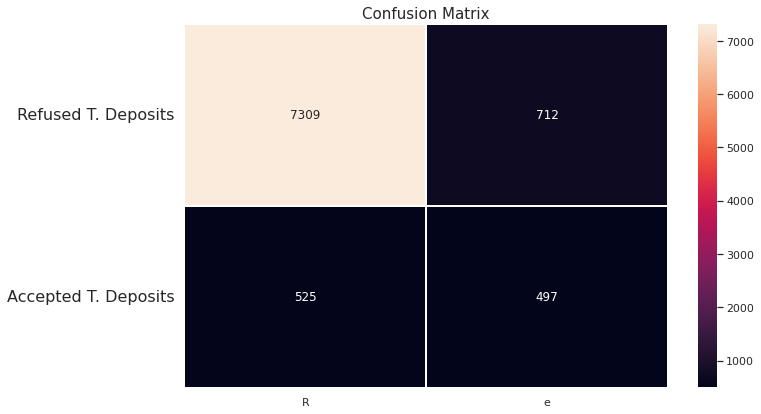

In [ ]:
confu_mat(dt, X_train, X_test, y_train, y_test)

With hyper parameters tuning 

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.01,0.05,0.1]}

In [ ]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)
fit_mod(dt_grid, X_train_sm, X_test, y_train_sm, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training accuracy Score    :  0.9079809410363312
Testing accuracy Score :  0.8826716797522945
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7750
           1       0.61      0.48      0.54      1293

    accuracy                           0.88      9043
   macro avg       0.77      0.72      0.74      9043
weighted avg       0.87      0.88      0.88      9043



In [ ]:
dt_grid.best_params_

{'max_depth': 20, 'min_samples_split': 0.01}

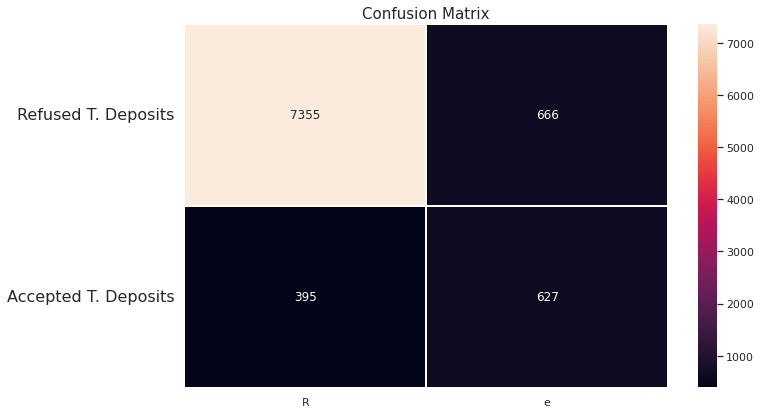

In [ ]:
confu_mat(dt_grid, X_train, X_test, y_train, y_test)

ROC AOC Curve for Decision Tree Classifier

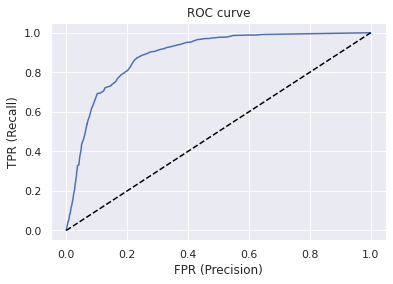

0.8866891972173826

In [ ]:
roc_score_dt,dt_fpr,dt_tpr,dt_probability = Roc_curve(dt_grid, X_train_sm, X_test, y_train_sm, y_test)
roc_score_dt

The 'try except' is finished


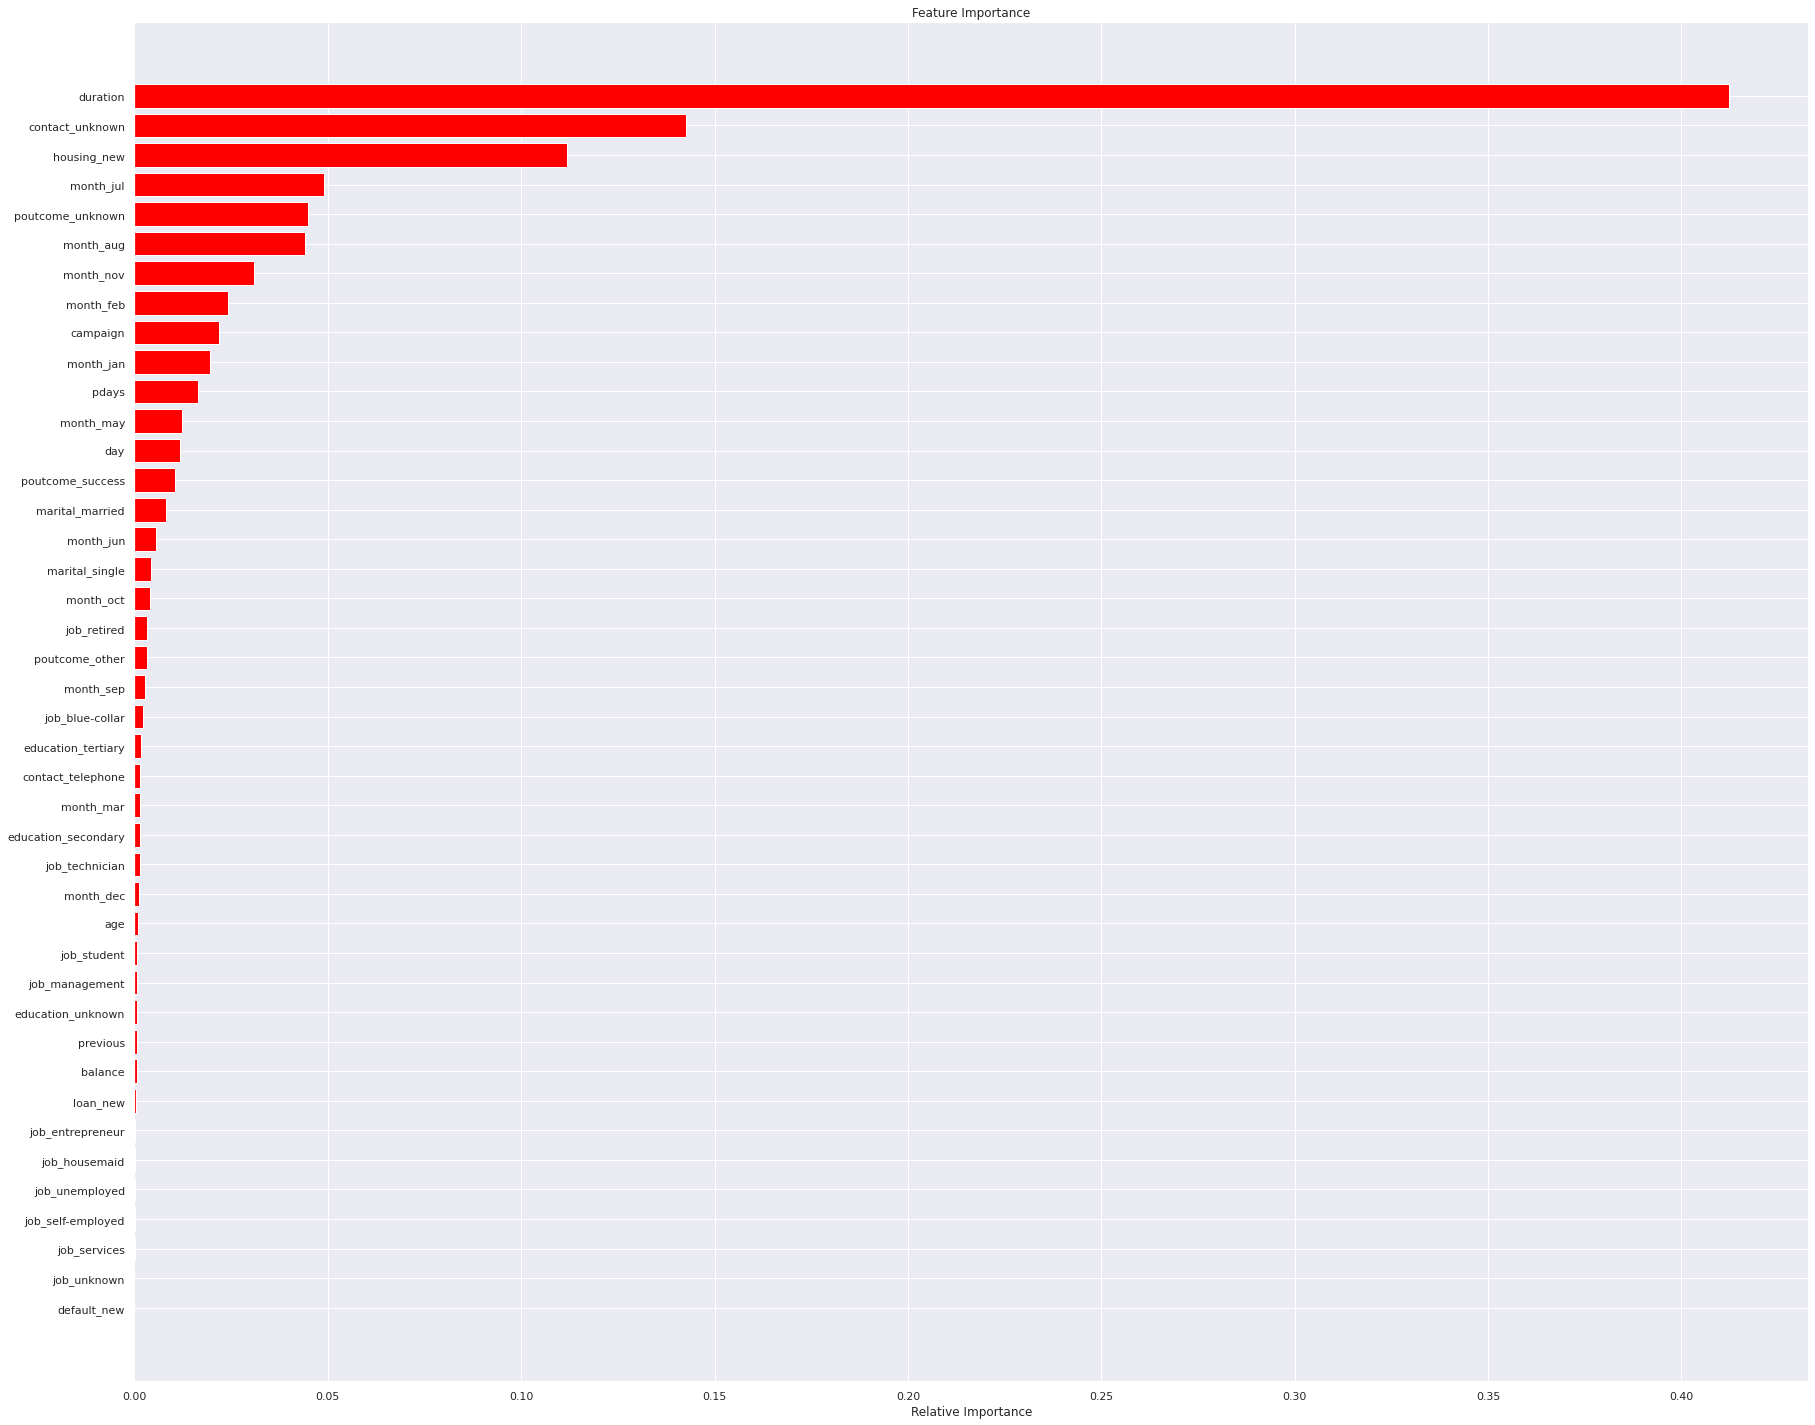

In [ ]:
imp_fe(dt_grid)

## Random Forest Classifier


with oversampled data 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

fit_mod(rfc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  1.0
Testing accuracy Score :  0.9031294924250802
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8181
           1       0.49      0.58      0.54       862

    accuracy                           0.90      9043
   macro avg       0.72      0.76      0.74      9043
weighted avg       0.91      0.90      0.91      9043



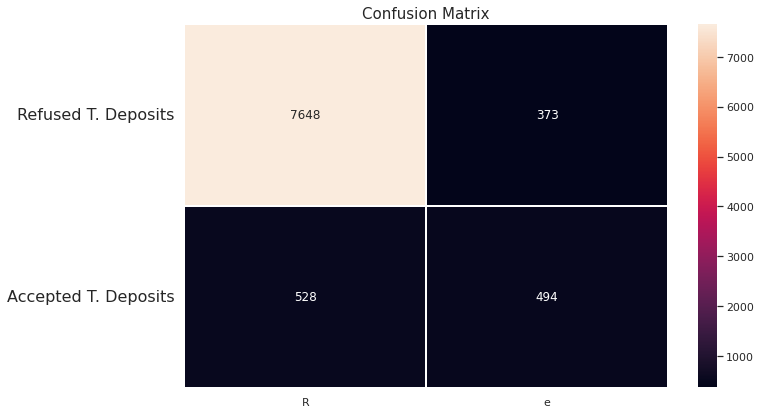

In [ ]:
confu_mat(rfc, X_train_sm, X_test, y_train_sm, y_test)

with hyper parameter tuning 

In [ ]:
#Hyperparameter Grid
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
param_dict={'max_depth': [20],
            'min_samples_leaf': [0.01,0.1,1,5],
            'min_samples_split': [ 0.01,2,5,10],
            'n_estimators': [ 250]}

In [ ]:
#implementating RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Creating an instance of the RandomForestClassifier
rfc = RandomForestClassifier()
#random search
rfc_grid = RandomizedSearchCV(estimator=rfc,param_distributions=param_dict,cv=5,verbose=2,scoring='roc_auc',n_iter=5,random_state=0)
fit_mod(rfc_grid, X_train_sm, X_test, y_train_sm, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=10, min_samples_leaf=0.01, min_samples_split=2, n_estimators=250; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=0.01, min_samples_split=2, n_estimators=250; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=0.01, min_samples_split=2, n_estimators=250; total time=   8.0s
[CV] END max_depth=10, min_samples_leaf=0.01, min_samples_split=2, n_estimators=250; total time=   7.9s
[CV] END max_depth=10, min_samples_leaf=0.01, min_samples_split=2, n_estimators=250; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=0.1, min_samples_split=5, n_estimators=250; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=0.1, min_samples_split=5, n_estimators=250; total time=   4.9s
[CV] END max_depth=10, min_samples_leaf=0.1, min_samples_split=5, n_estimators=250; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=0.1, min_samples_split=5, n_estimators=250; total time=   4.7s
[CV] END

In [ ]:
rfc_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

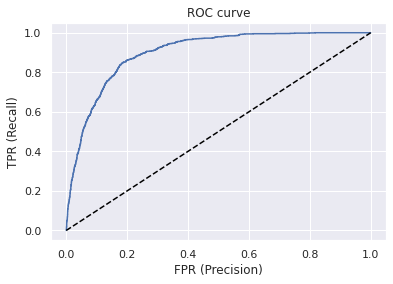

0.8991937992515244

In [ ]:
roc_score_rfc,rfc_fpr,rfc_tpr,rfc_probability = Roc_curve(rfc_grid, X_train, X_test, y_train, y_test)
roc_score_rfc

The 'try except' is finished


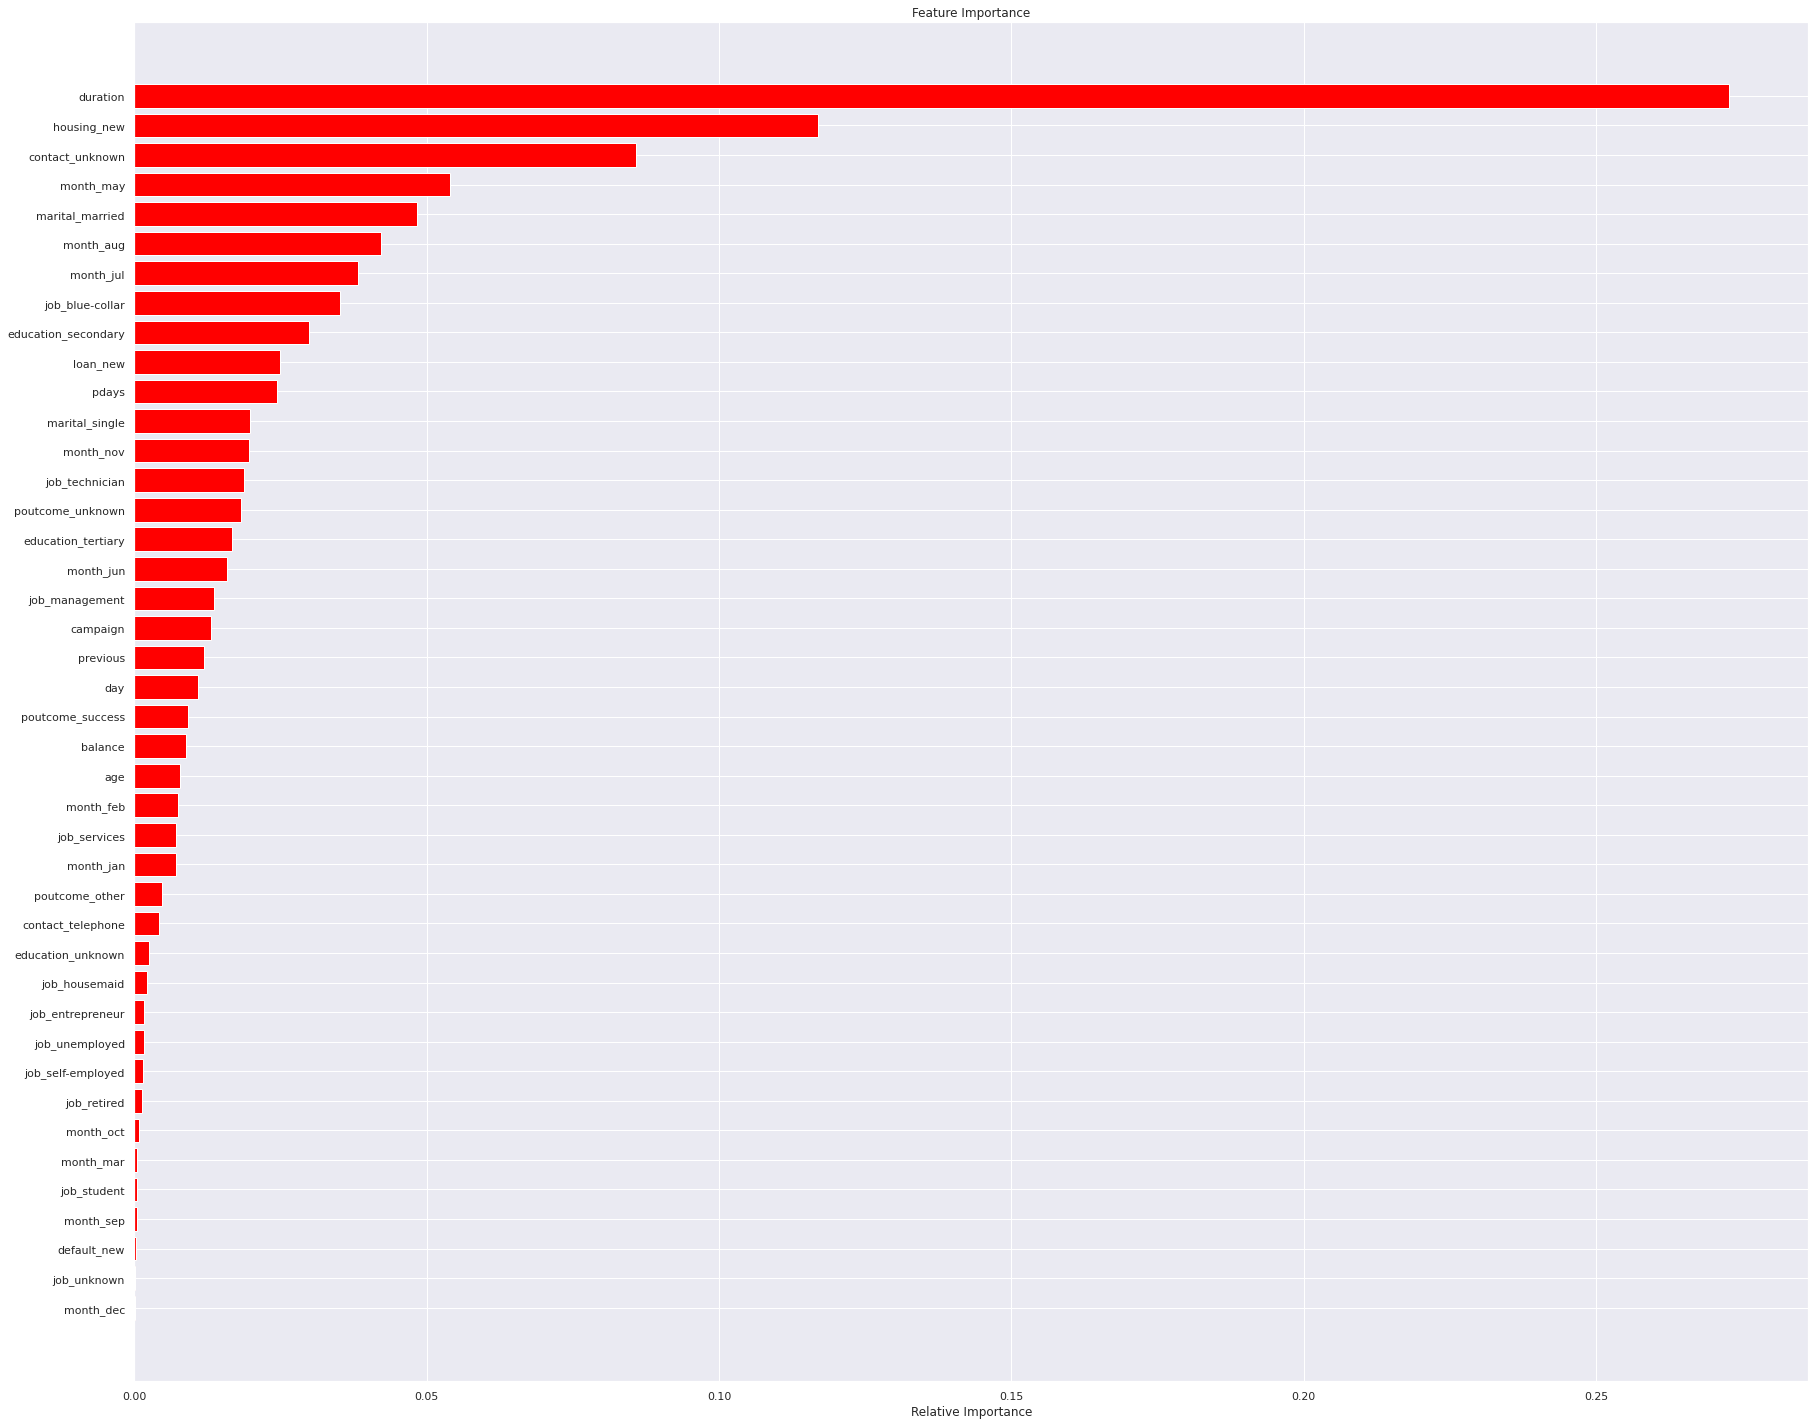

In [ ]:
imp_fe(rfc_grid)

## Gradient Boosting Classifier

with over sampled data 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

fit_mod(gbc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9318203191122535
Testing accuracy Score :  0.8874267389140772
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8053
           1       0.49      0.50      0.49       990

    accuracy                           0.89      9043
   macro avg       0.71      0.72      0.72      9043
weighted avg       0.89      0.89      0.89      9043



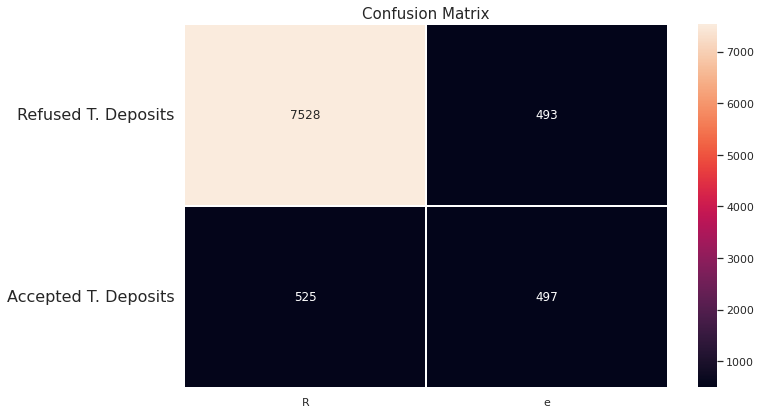

In [ ]:
confu_mat(gbc, X_train, X_test, y_train, y_test)

With hyper parameter tuning 

In [ ]:
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
gbc = GradientBoostingClassifier( random_state=0)


gb_grid= GridSearchCV(gbc,param_grid=params,verbose=0,cv=3)
fit_mod(gb_grid, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.96542428137049
Testing accuracy Score :  0.8976003538648678
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8031
           1       0.54      0.55      0.54      1012

    accuracy                           0.90      9043
   macro avg       0.74      0.74      0.74      9043
weighted avg       0.90      0.90      0.90      9043



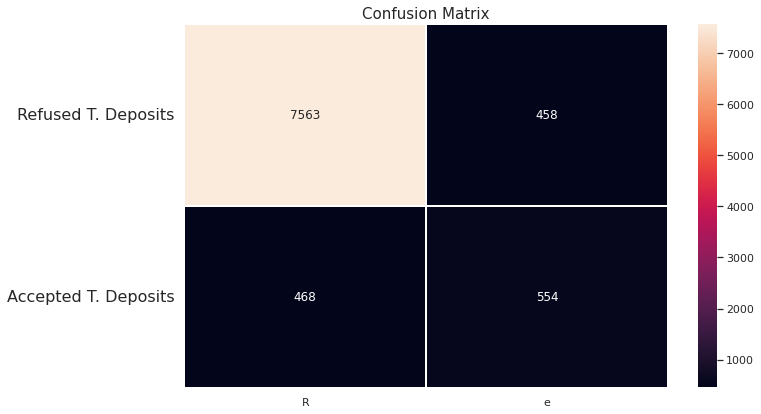

In [ ]:
confu_mat(gb_grid, X_train, X_test, y_train, y_test)

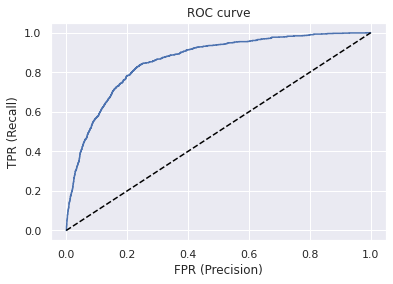

0.8601845302851053

In [ ]:
gb_score_gb,gb_fpr,gb_tpr,gb_probability = Roc_curve(lr, X_train, X_test, y_train, y_test)
gb_score_gb

The 'try except' is finished


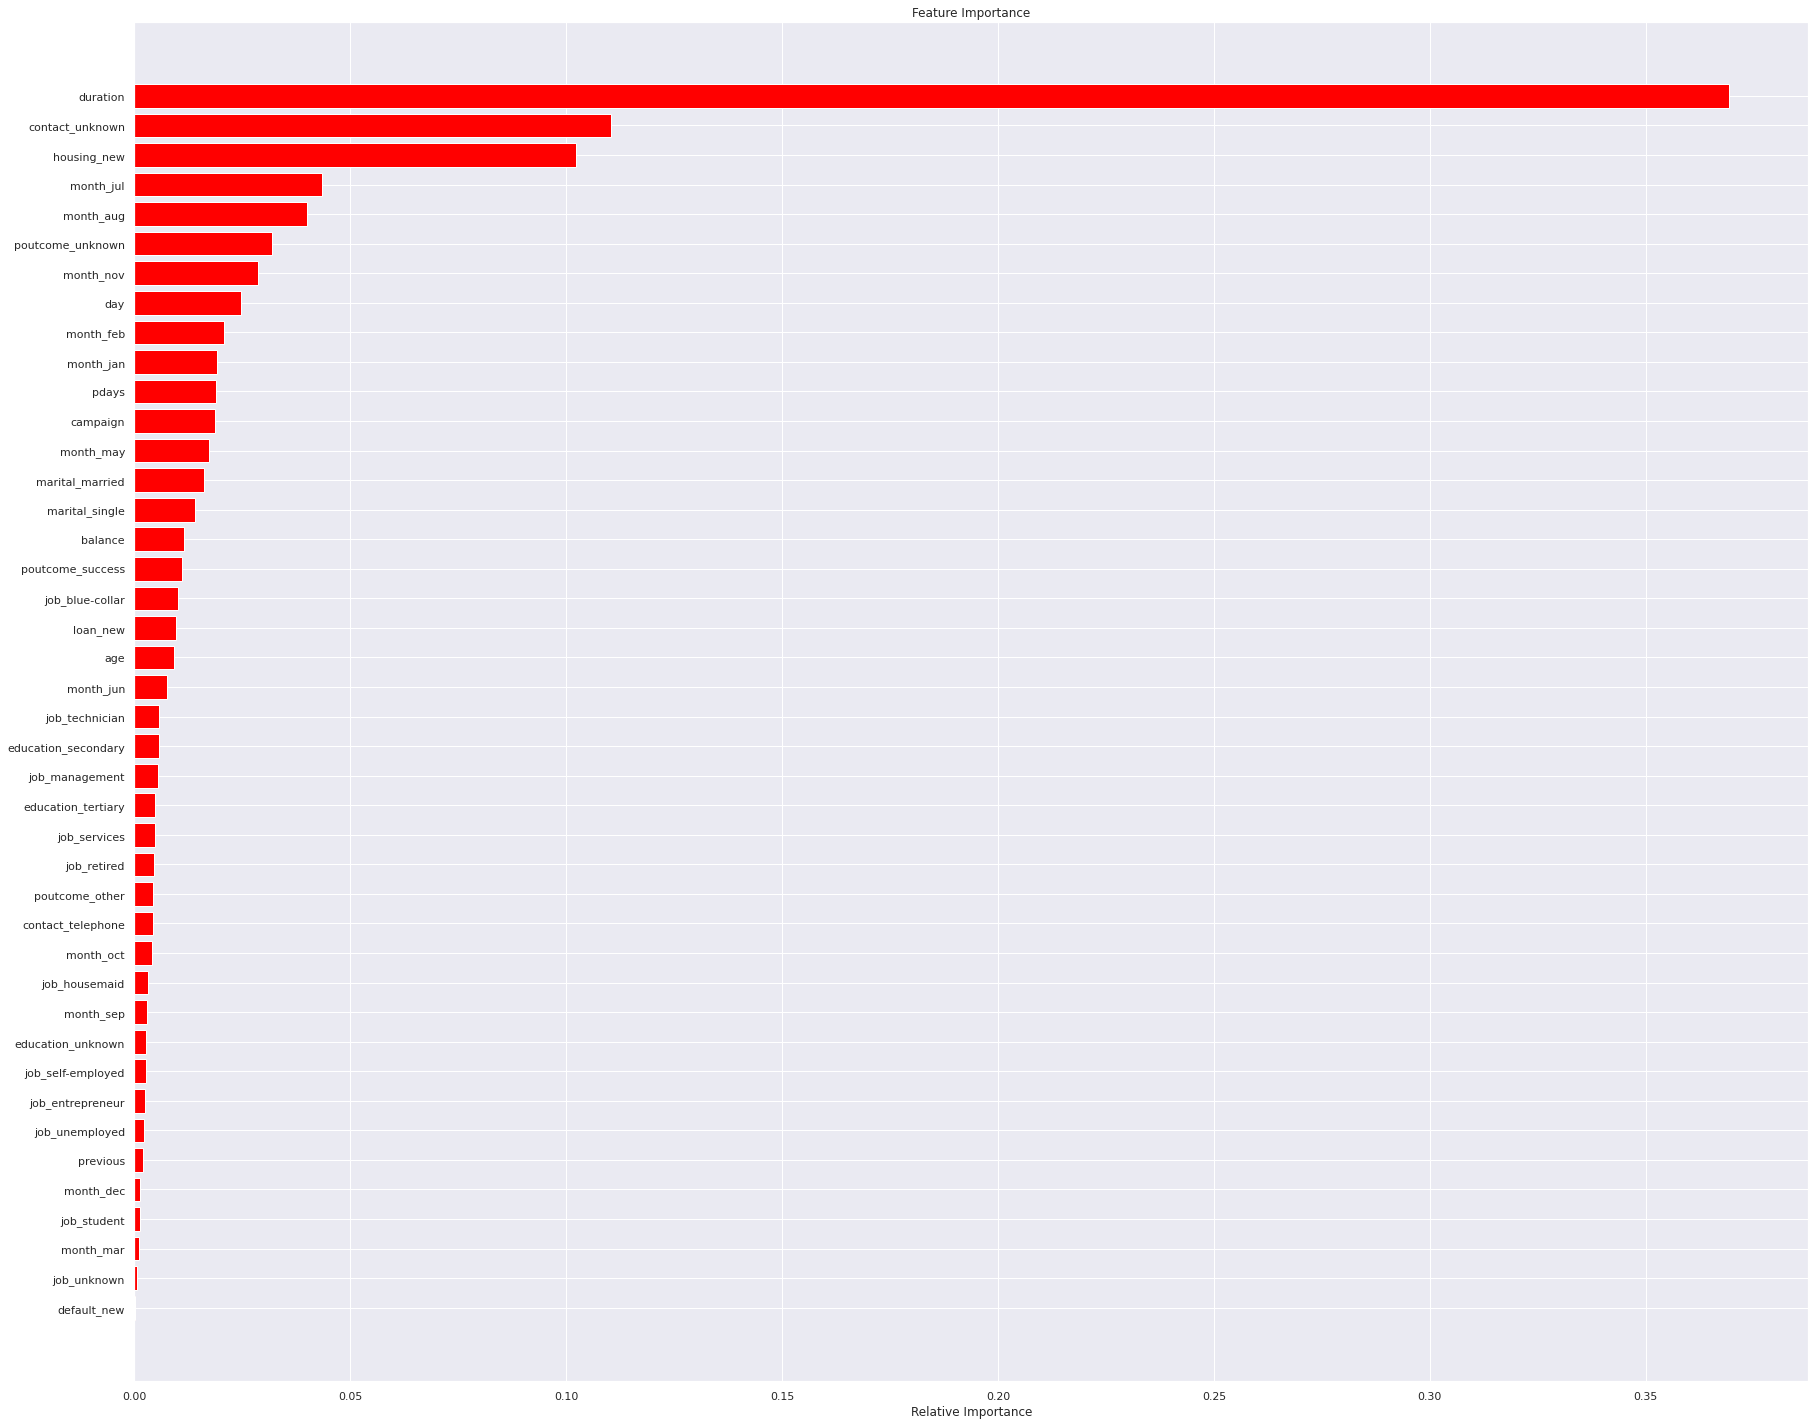

In [ ]:
imp_fe(gb_grid)

## **K Neighbors Classifier**

With over sampled data 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()


fit_mod(knc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9408795962509012
Testing accuracy Score :  0.8740462235983634
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8198
           1       0.36      0.43      0.39       845

    accuracy                           0.87      9043
   macro avg       0.65      0.68      0.66      9043
weighted avg       0.89      0.87      0.88      9043



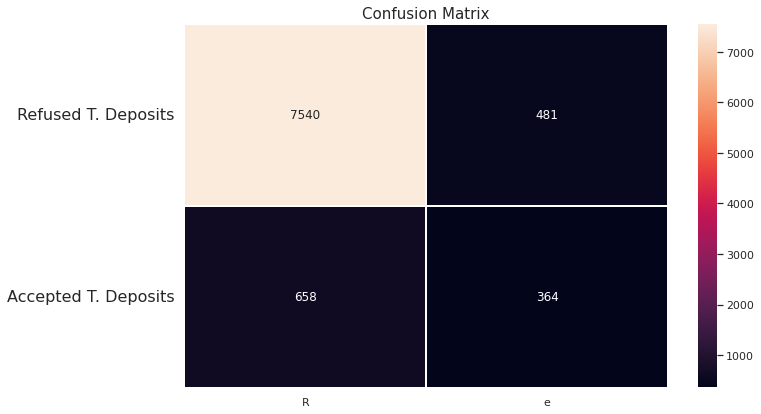

In [ ]:
confu_mat(knc, X_train, X_test, y_train, y_test)

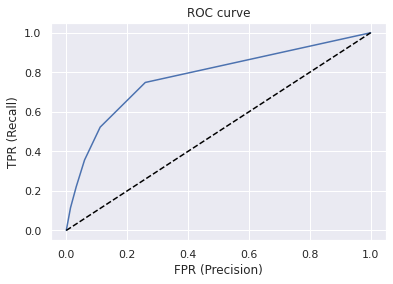

0.7759395529982329

In [ ]:

roc_score_knc,knc_fpr,knc_tpr,knc_probability = Roc_curve(knc, X_train, X_test, y_train, y_test)
roc_score_knc

With hyper parameter tuning 

One of the challenges in a k-NN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.
for details into Hyperparameter Tuning [click here](https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning) 

In [ ]:
from sklearn import metrics


In [ ]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_sm,y_train_sm)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.85967046, 0.88178702, 0.87006524, 0.8793542 , 0.87404622,
       0.8793542 , 0.87205573, 0.87681079, 0.87117107, 0.87415681,
       0.87128165, 0.87404622, 0.87183457, 0.87448855, 0.87028641,
       0.8722769 , 0.86829592, 0.87061816, 0.86707951, 0.86962291])

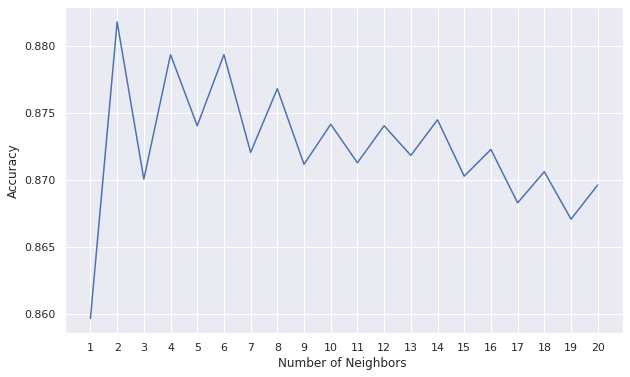

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

n_neighbors: Decide the best k based on the values we have computed earlier.
weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
metric: The distance metric to be used will calculating the similarity.

In [ ]:
grid_params = { 'n_neighbors' : [2],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
knc = KNeighborsClassifier()

knc_grid = GridSearchCV(knc, grid_params, verbose = 1, cv=3, n_jobs = -1)
fit_mod(knc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9408795962509012
Testing accuracy Score :  0.8740462235983634
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8198
           1       0.36      0.43      0.39       845

    accuracy                           0.87      9043
   macro avg       0.65      0.68      0.66      9043
weighted avg       0.89      0.87      0.88      9043



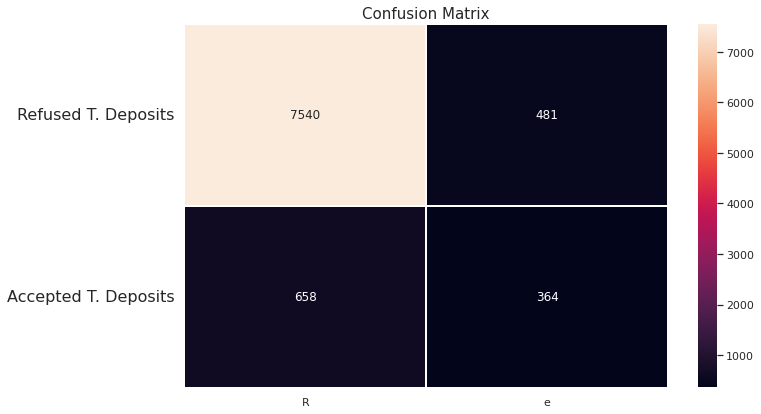

In [ ]:
confu_mat(knc_grid, X_train, X_test, y_train, y_test)

In [ ]:
imp_fe(knc_grid)

AttributeError: ignored

## XGB Classifier

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgbc = xgb.XGBClassifier()

fit_mod(xgbc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9332309331995862
Testing accuracy Score :  0.8887537321685282
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7813
           1       0.61      0.51      0.55      1230

    accuracy                           0.89      9043
   macro avg       0.77      0.73      0.74      9043
weighted avg       0.88      0.89      0.88      9043



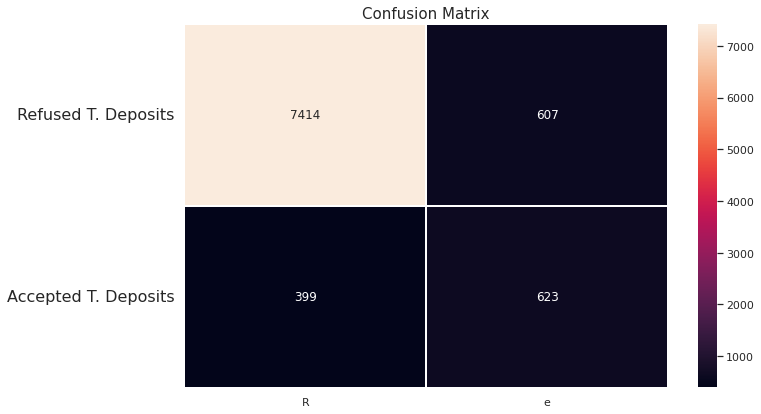

In [ ]:
confu_mat(xgbc, X_train, X_test, y_train, y_test)

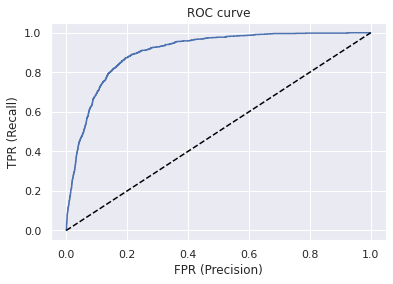

In [ ]:
roc_score_xgb,xgb_fpr,xgb_tpr,Xgb_probability = Roc_curve(xgbc, X_train, X_test, y_train, y_test)

With  Hyperparameter Tuning
for more info [click](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook#3.-Basic-Setup-)

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
xgbc = xgb.XGBClassifier()

xgbc_grid=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

fit_mod(xgbc_grid, X_train_sm, X_test, y_train_sm, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training accuracy Score    :  0.9967817482411537
Testing accuracy Score :  0.9034612407386929
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8090
           1       0.54      0.58      0.56       953

    accuracy                           0.90      9043
   macro avg       0.74      0.76      0.75      9043
weighted avg       0.91      0.90      0.90      9043



In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
xgbc_grid.fit(X_train_sm,y_train_sm)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 5 minutes and 53.49 seconds.


Important Feature for XG Boost Classifier

In [ ]:
xgbc_grid.best_estimator_.feature_importances_

array([0.00316698, 0.00291915, 0.0049942 , 0.02112239, 0.0061189 ,
       0.00687336, 0.00222014, 0.01456334, 0.01006236, 0.01474999,
       0.00939624, 0.01180952, 0.01055369, 0.00862428, 0.00707892,
       0.01000683, 0.00978252, 0.00435595, 0.01437872, 0.01563052,
       0.0104421 , 0.01006271, 0.01261081, 0.01101415, 0.15163355,
       0.06395882, 0.00931128, 0.0301649 , 0.0411411 , 0.07894833,
       0.0260053 , 0.00667835, 0.03254374, 0.03869366, 0.01355085,
       0.01000288, 0.01321161, 0.01541457, 0.08631589, 0.12067888,
       0.02576039, 0.00344809], dtype=float32)

The 'try except' is finished


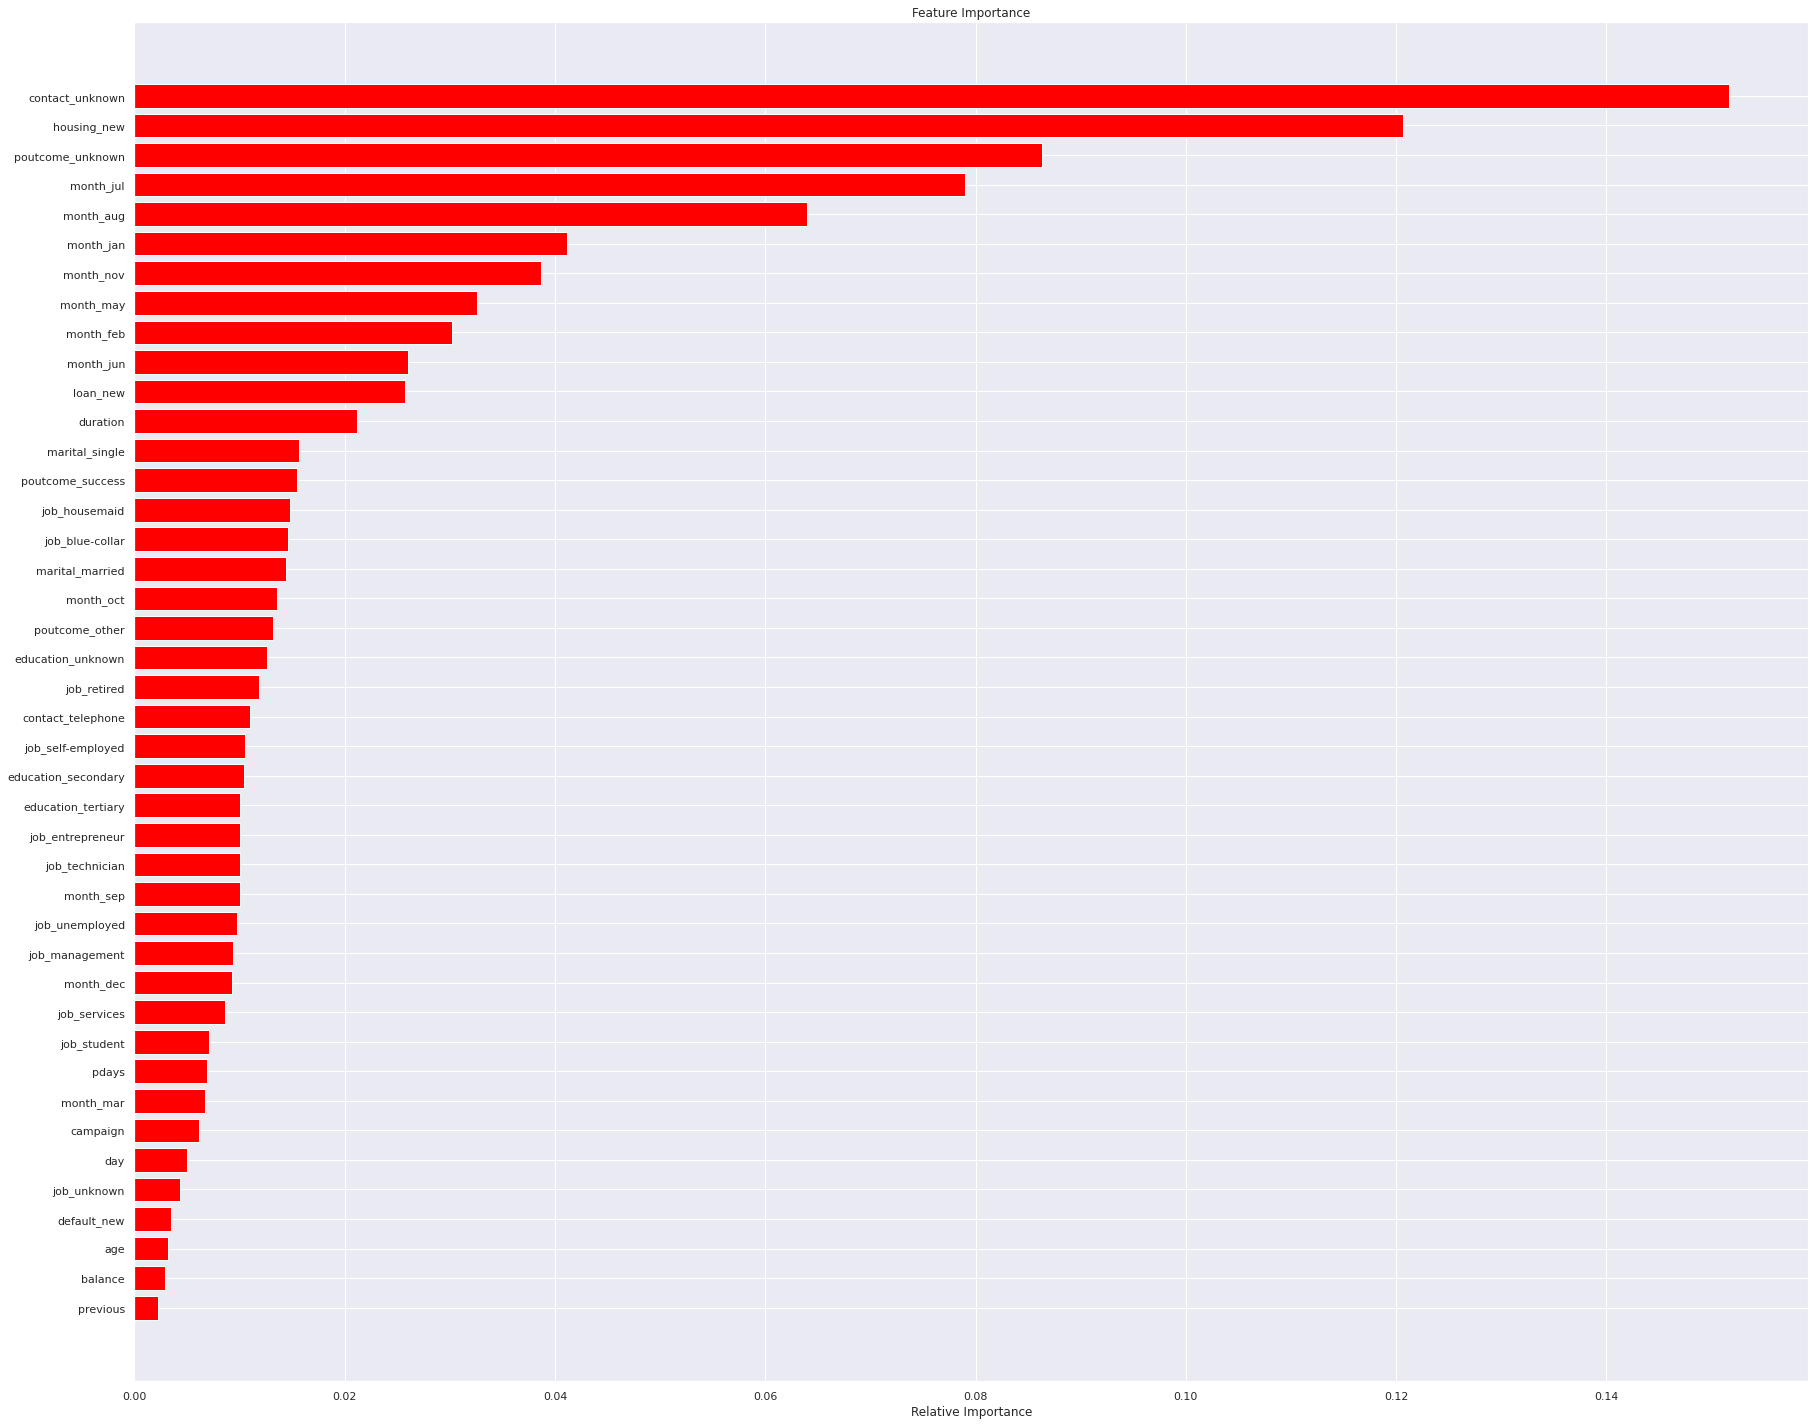

In [ ]:
imp_fe(xgbc_grid)

## Naive Byes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nbc = MultinomialNB()

fit_mod(nbc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.8573712422808062
Testing accuracy Score :  0.8302554462014818
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7596
           1       0.46      0.32      0.38      1447

    accuracy                           0.83      9043
   macro avg       0.67      0.62      0.64      9043
weighted avg       0.81      0.83      0.82      9043



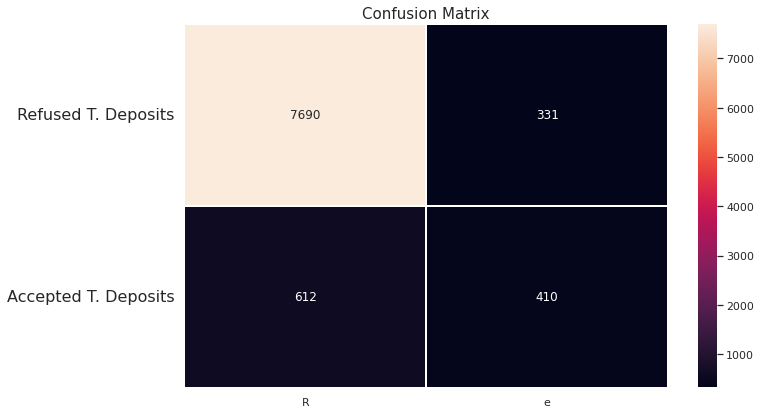

In [ ]:
confu_mat(nbc, X_train_sm, X_test, y_train_sm, y_test)

ROC AOC Curve for Naive Byes Classifier



Exception ignored in: <function Booster.__del__ at 0x7f231d2e9e60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
Exception ignored in: <function Booster.__del__ at 0x7f231d2e9e60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


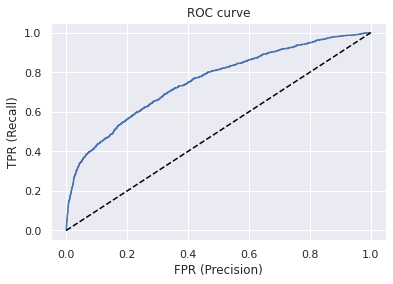

In [ ]:
roc_score_nbc , nbc_fpr , nbc_tpr , nbc_probability = Roc_curve(nbc, X_train, X_test, y_train, y_test)

## Support Vector machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC

svm = SVC()

fit_mod(svm, X_train_sm, X_test, y_train_sm, y_test)


Training accuracy Score    :  0.9406758408827309
Testing accuracy Score :  0.8957204467543957
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8302
           1       0.40      0.55      0.47       741

    accuracy                           0.90      9043
   macro avg       0.68      0.74      0.70      9043
weighted avg       0.91      0.90      0.90      9043



Exception ignored in: <function Booster.__del__ at 0x7f231d2e9e60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
Exception ignored in: <function Booster.__del__ at 0x7f231d2e9e60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
Exception ignored in: <function Booster.__del__ at 0x7f231d2e9e60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


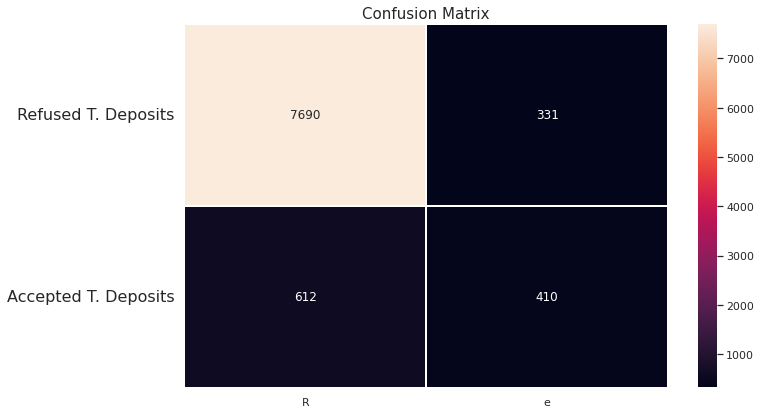

In [ ]:
confu_mat(svm, X_train_sm, X_test, y_train_sm, y_test)

In [ ]:
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')
# List of gamma values
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')


The list of values for C are [ 0.1  1.  10. ]
The list of values for gamma are [ 0.1  1.  10. ]


In [ ]:
# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
# Define grid search
svm_grid = GridSearchCV(estimator=svm, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

In [ ]:
#fit_mod(svm_grid, X_train_sm, X_test, y_train_sm, y_test)

In [ ]:
#confu_mat(svm_grid, X_train_sm, X_test, y_train_sm, y_test)

In [ ]:
X_train.shape

(36168, 42)

In [ ]:
X_test.shape

(9043, 42)

In [ ]:
y_train_sm.shape

(63802,)

In [ ]:
y_test.shape

(9043,)

In [ ]:
# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)

fit_mod(clf, X_train_sm, X_test, y_train_sm, y_test)

AttributeError: ignored

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Neural Networks
We will build a simple Binary Classification model using tensor flow 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [ ]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
nX_train, ntemp_y_test =  train_test_split(df_m, test_size=0.4)

# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
nX_test, nX_valid =  train_test_split(ntemp_y_test, test_size=0.5)

# Removing the target variable 

ny_train = nX_train.pop('y_new')
ny_test = nX_test.pop('y_new')
ny_valid = nX_valid.pop('y_new')

#Oversampling the train 

sm = SMOTE(random_state = 0)
nX_train_sm, ny_train_sm = sm.fit_resample(X_train, y_train)


#Transforming the data 
scaler = MinMaxScaler()

nX_train_sm = scaler.fit_transform(nX_train_sm)
nX_test     = scaler.transform(nX_test)
nX_valid    = scaler.transform(nX_valid)




In [ ]:
# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(32, input_shape = (nX_train_sm.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
#     model.add(Dense(128,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model


EPOCHS = 100
batch_size = 16 # 6 iteration

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        nX_train_sm, 
        ny_train_sm,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(nX_train_sm.shape[0] / batch_size) ,
        validation_data = (nX_valid, ny_valid),  
    )


Here is a summary of this model: 
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                1376      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3987/3987 [==============================] - 19s 4ms/step - loss: 0.6874 - accuracy: 0.4907 - val_loss: 0.6737 - val_accuracy: 0.8444
Epoch 2/100
3987/3987 [==============================] - 16s 4ms/step - loss: 0.6454 - accuracy: 0.5045 - val_loss: 0.5973 - val_accuracy: 0.8716
Epoch 3/100
3987/3987 [==============================] - 22s 5ms/step - loss: 0.6217 - accuracy: 0.5130 - val_loss: 0.558

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.26,0.90,0.35,0.88,95
96,0.26,0.90,0.35,0.88,96
97,0.26,0.91,0.35,0.88,97
98,0.26,0.91,0.35,0.88,98
99,0.26,0.91,0.35,0.88,99


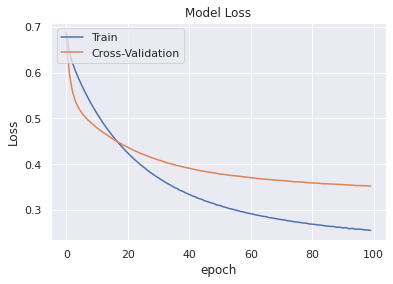

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

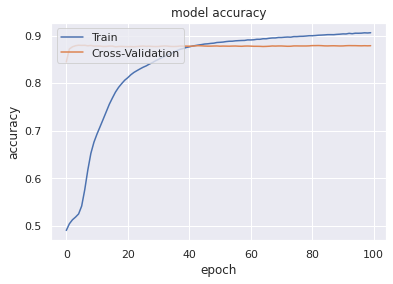

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [ ]:
print('Train Split: ')
loss, accuracy = model.evaluate(nX_train_sm, ny_train_sm, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
1994/1994 [==============================] - 5s 3ms/step - loss: 0.2551 - accuracy: 0.9061
Accuracy   :  0.91 


In [ ]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(nX_valid, ny_valid, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
283/283 - 1s - loss: 0.3523 - accuracy: 0.8786 - 672ms/epoch - 2ms/step
Accuracy   :  0.88 


In [ ]:
print('Test Split: ')
loss, accuracy =  model.evaluate(nX_train_sm, ny_train_sm, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Test Split: 
1994/1994 - 6s - loss: 0.2551 - accuracy: 0.9061 - 6s/epoch - 3ms/step
Accuracy   :  0.91 


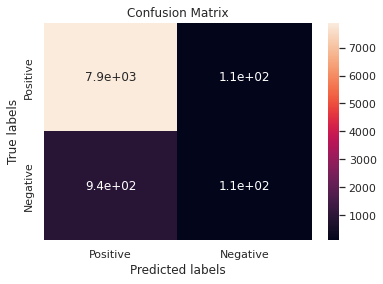

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(nX_test)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(ny_test, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

In [ ]:
fit_mod1(model, nX_train, nX_test, ny_train, ny_test)

ValueError: ignored

## Comparision of different classifiers 

In [ ]:
#roc_auc_score for different classifiers
from sklearn.metrics import roc_auc_score
print('logistic regression Classifier Score: ',  roc_auc_score(y_test, lr_probability))
print('Decision tree Classifier Score: ',        roc_auc_score(y_test, dt_probability))
print('Random Forest Classifier: ',              roc_auc_score(y_test, rfc_probability))
print('Gradient Boosting Classifier Score: ',    roc_auc_score(y_test, gb_probability))
print('knn Classifier Score: ',                  roc_auc_score(y_test, knc_probability))
print('XGB Classifier: ',                        roc_auc_score(y_test, Xgb_probability))
print('naive bayes classifer: ',                 roc_auc_score(y_test, nbc_probability))

logistic regression Classifier Score:  0.8640471892397916
Decision tree Classifier Score:  0.8866891972173826
Random Forest Classifier:  0.8991937992515244
Gradient Boosting Classifier Score:  0.8601845302851053
knn Classifier Score:  0.7759395529982329
XGB Classifier:  0.9031763733701967
naive bayes classifer:  0.7534477134508217


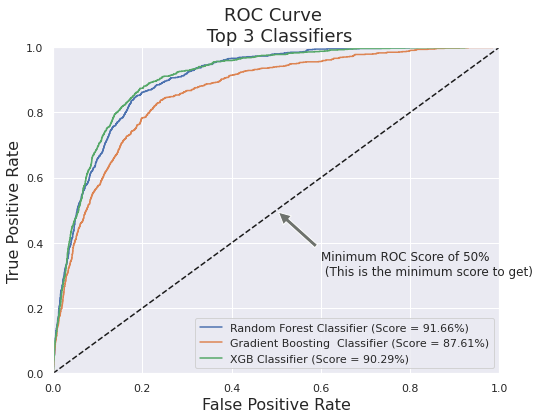

In [ ]:
#roc curves
def graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (Score = 91.66%)')
    plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting  Classifier (Score = 87.61%)')
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier (Score = 90.29%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr)
plt.show()